In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
conn = sqlite3.connect('../../data/offers.db')
cursor = conn.cursor()

# Fetch USD data from the database
cursor.execute("SELECT rate FROM USD_pre_processed_data")
usd_data = cursor.fetchall()

# Fetch EUR data from the database
cursor.execute("SELECT rate FROM EUR_pre_processed_data")
eur_data = cursor.fetchall()

# Convert the USD and EUR data to numpy arrays
usd_data = np.squeeze(np.array(usd_data).astype(np.float64), axis=1)
eur_data = np.squeeze(np.array(eur_data).astype(np.float64), axis=1)

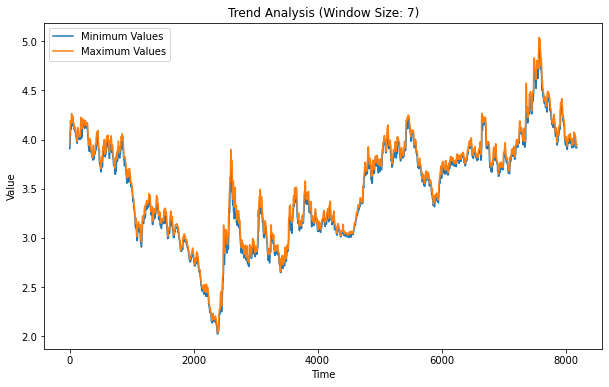

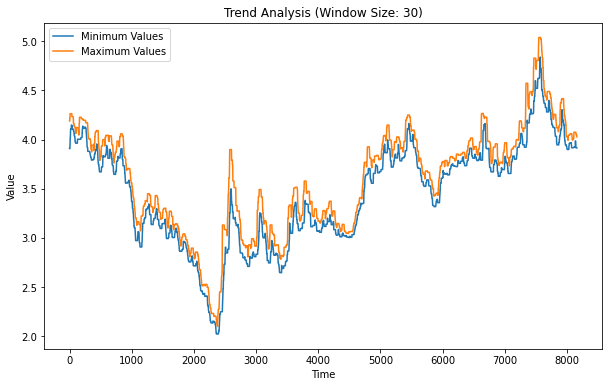

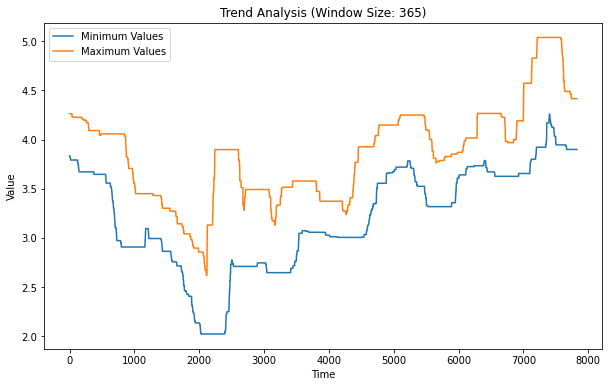

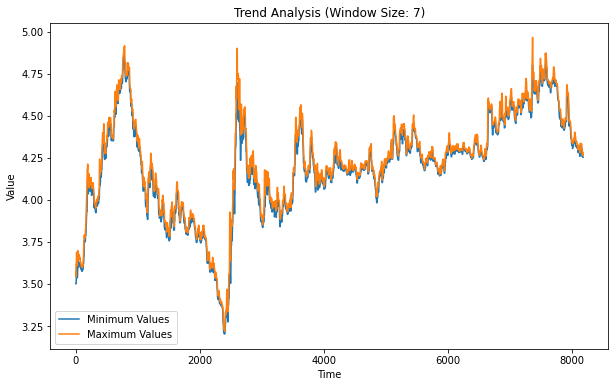

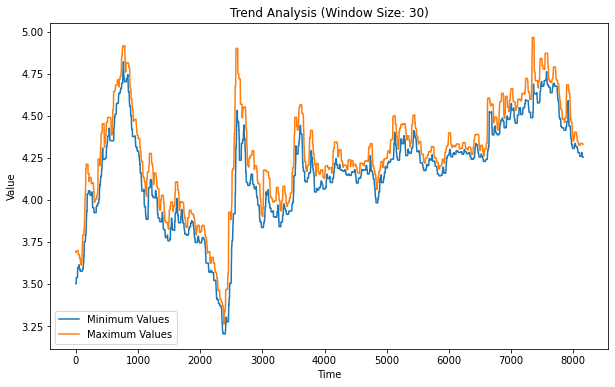

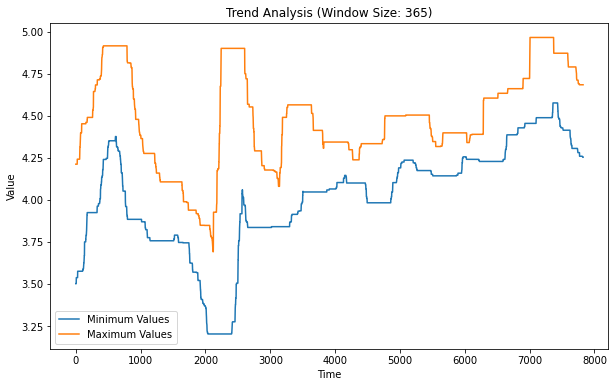

In [6]:
window_sizes = [7, 30, 365]  # Define the sizes of the windows

for data in [usd_data, eur_data]:
    for window_size in window_sizes:
        # Calculate the minimum and maximum values for each window
        min_values = np.nanmin(np.lib.stride_tricks.sliding_window_view(data, window_size), axis=1)
        max_values = np.nanmax(np.lib.stride_tricks.sliding_window_view(data, window_size), axis=1)

        # Plot the trend analysis with only min and max values
        plt.figure(figsize=(10, 6))
        plt.plot(min_values, label='Minimum Values')
        plt.plot(max_values, label='Maximum Values')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title(f'Trend Analysis (Window Size: {window_size})')
        plt.legend()
        plt.show()


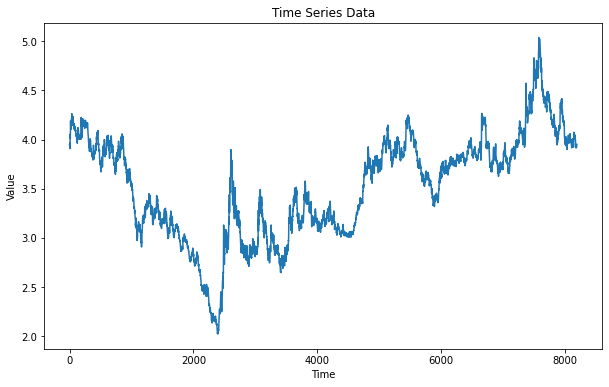

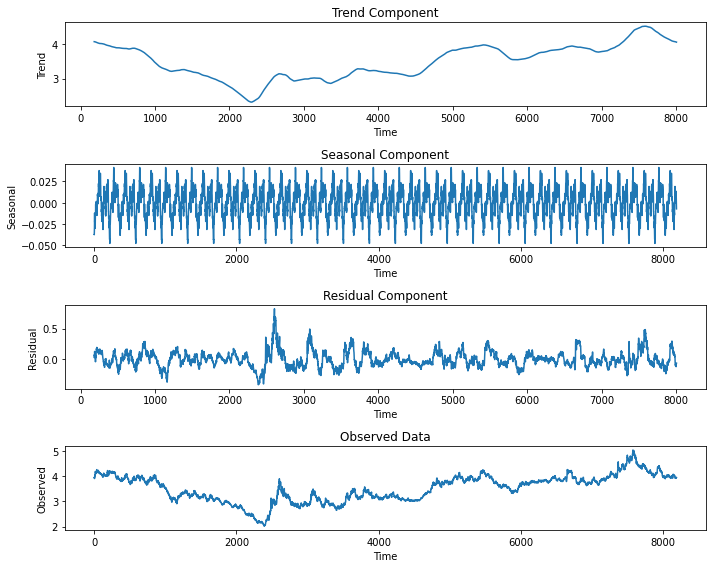

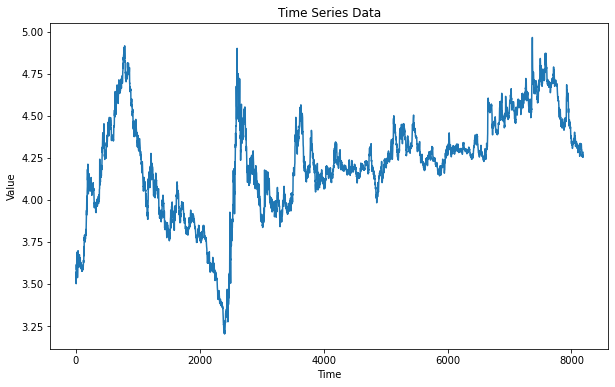

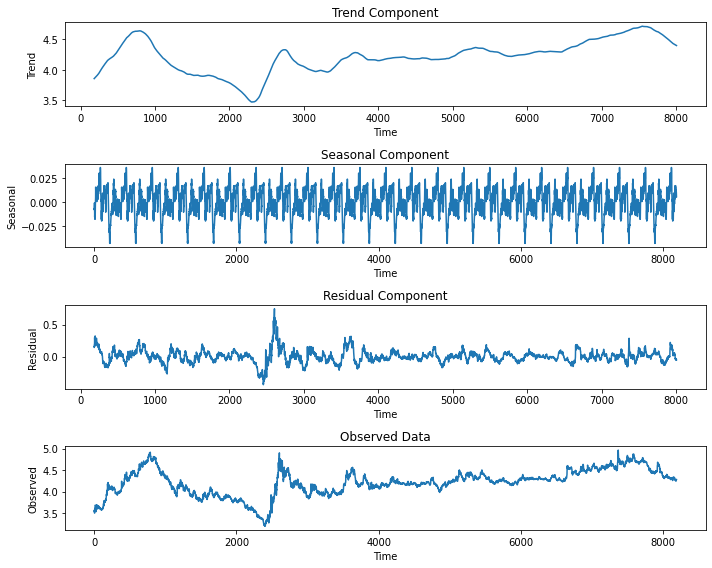

In [12]:
for data in [usd_data, eur_data]:
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Time Series Data')
    plt.show()

    # Perform time series decomposition
    decomposition = seasonal_decompose(data, model='additive', period=365)  # Specify the period

    # Plot the trend, seasonal, and residual components
    plt.figure(figsize=(10, 8))
    plt.subplot(411)
    plt.plot(decomposition.trend)
    plt.xlabel('Time')
    plt.ylabel('Trend')
    plt.title('Trend Component')

    plt.subplot(412)
    plt.plot(decomposition.seasonal)
    plt.xlabel('Time')
    plt.ylabel('Seasonal')
    plt.title('Seasonal Component')

    plt.subplot(413)
    plt.plot(decomposition.resid)
    plt.xlabel('Time')
    plt.ylabel('Residual')
    plt.title('Residual Component')

    plt.subplot(414)
    plt.plot(decomposition.observed)
    plt.xlabel('Time')
    plt.ylabel('Observed')
    plt.title('Observed Data')

    plt.tight_layout()
    plt.show()